<a href="https://colab.research.google.com/github/BasselKhalid/Thesis/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Description

This dataset contains synthetic records representing customer shopping activity across a range of product categories, demographic groups, and purchasing preferences. It has been designed to simulate real-world retail behavior, making it suitable for exploring customer segmentation strategies, especially in the context of small and medium-sized enterprises (SMEs) that often operate with limited analytical resources.

The dataset comprises 3,900 rows and 19 columns. Each row corresponds to a unique transaction and includes both customer-specific information and purchase-related attributes. The data covers customer demographics such as age, gender, and location, as well as behavioral indicators like purchase amount, frequency of purchases, subscription status, and preferred payment method. Additionally, the dataset captures product details including item type, category, size, color, and season of purchase.

Key transactional fields include the purchase amount in USD, shipping type selected, whether a discount or promo code was applied, and the review rating provided by the customer. The column titled **"Previous Purchases"** indicates the number of transactions the customer has made prior to the current one, while **"Frequency of Purchases"** denotes how often the customer tends to shop (e.g., weekly, monthly, annually).

Overall, this dataset offers a rich and structured foundation for performing data-driven segmentation, behavioral analysis, and predictive modeling. It supports a wide range of tasks including exploratory data analysis (EDA), feature engineering, machine learning pipeline development, and model evaluation in the domain of consumer behavior and retail analytics.

---

### Column Description

| Column                     | Description                                         |
|---------------------------|-----------------------------------------------------|
| Customer ID               | Unique identifier for each customer                 |
| Age                       | Age of the customer                                 |
| Gender                    | Gender identity                                     |
| Item Purchased            | Type of product purchased                           |
| Category                  | Product category (e.g., Clothing, Footwear)         |
| Purchase Amount (USD)     | Dollar amount spent                                 |
| Location                  | Region of the customer                              |
| Size                      | Product size                                        |
| Color                     | Color of the purchased item                         |
| Season                    | Shopping season                                     |
| Review Rating             | Customer product rating (1–5 scale)                 |
| Subscription Status       | Whether the customer is subscribed                  |
| Payment Method            | Payment method used                                 |
| Shipping Type             | Type of shipping selected                           |
| Discount Applied          | Whether a discount was used                         |
| Promo Code Used           | Whether a promo code was applied                    |
| Previous Purchases        | Number of past purchases by the customer            |
| Preferred Payment Method  | Usual payment method                                |
| Frequency of Purchases    | Frequency (e.g., Weekly, Monthly)                   |


Importing Libraries and Dataset

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import zscore

# Warnings & Settings
import warnings
warnings.filterwarnings('ignore')

# Plotting setup
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')


# Upload if running in Colab
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("shopping_trends.csv")


Saving shopping_trends.csv to shopping_trends.csv


Data Inspection and Cleaning:

 Step 1:  Inspect Dataset Structure

In [2]:
# Overview of the dataset
print("🔎 Dataset Structure:")
df.info()

# Preview the top 5 rows
print("\n📄 Data Preview:")
display(df.head())

# Check for missing values
print("\n🚨 Missing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0]
display(missing)

# Check for duplicates
print("\n📑 Number of duplicate rows:", df.duplicated().sum())


🔎 Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually



🚨 Missing Values:


,0



📑 Number of duplicate rows: 0


Step 2: Data Cleaning

In [3]:
# Drop Customer ID (not used for modeling)
if 'Customer ID' in df.columns:
    df.drop(columns=['Customer ID'], inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Impute missing numerical values with median (resistant to outliers)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Re-check for any remaining missing values
print("\n✅ Remaining Missing Values:")
print(df.isnull().sum().sum())

# Report dataset shape after cleaning
print(f"\n✅ Cleaned Dataset Shape: {df.shape}")



✅ Remaining Missing Values:
0

✅ Cleaned Dataset Shape: (3900, 18)


Step 3: Describe and Classify Feature Types

In [4]:
# Identify numerical and categorical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("📌 Numerical Features:", numerical_features)
print("📌 Categorical Features:", categorical_features)


📌 Numerical Features: ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
📌 Categorical Features: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


Exploratory Data Analysis (EDA)

Q1: What is the gender distribution of customers?

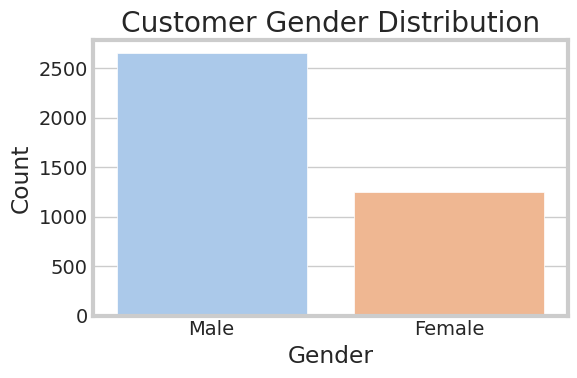

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Customer Gender Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Q2: Which product categories are most frequently purchased?

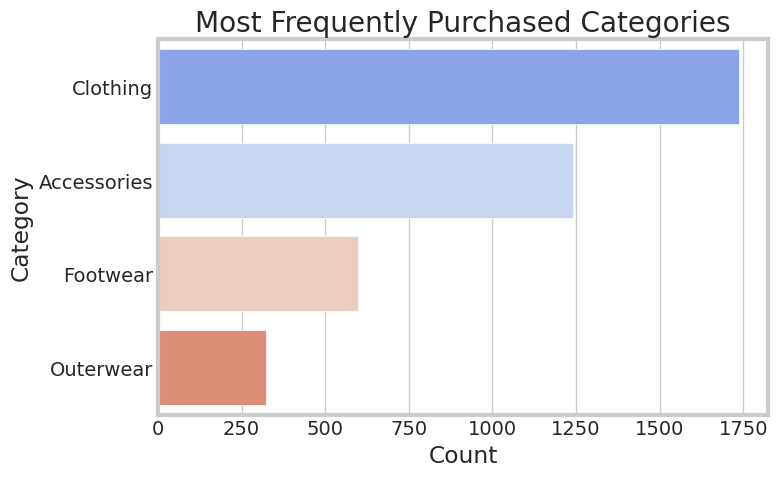

In [6]:
plt.figure(figsize=(8, 5))
order = df['Category'].value_counts().index
sns.countplot(y='Category', data=df, order=order, palette='coolwarm')
plt.title('Most Frequently Purchased Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


Q3: What is the most active shopping season?

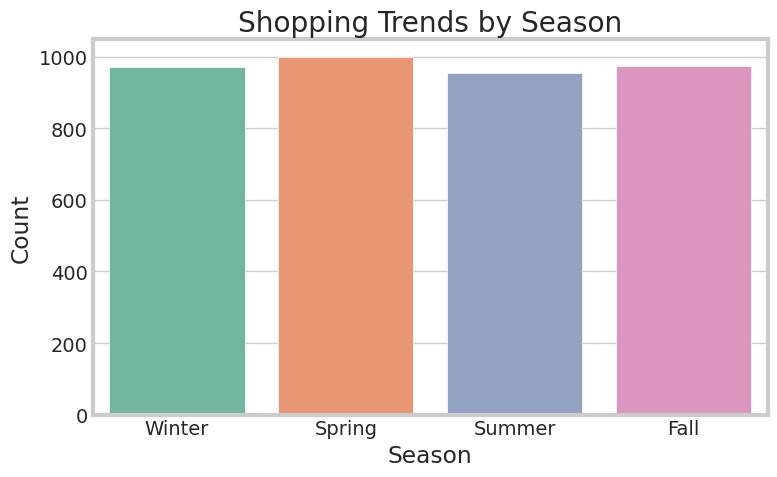

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', data=df, order=["Winter", "Spring", "Summer", "Fall"], palette='Set2')
plt.title('Shopping Trends by Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Q4: What is the distribution of purchase amounts?


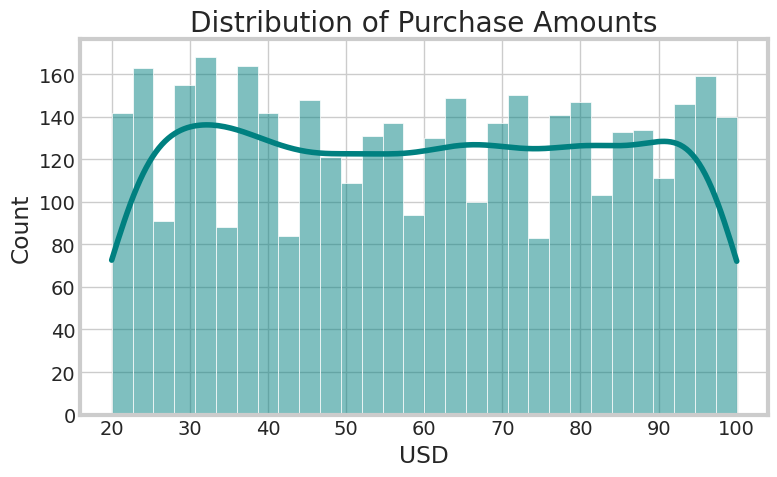

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30, color='teal')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('USD')
plt.tight_layout()
plt.show()


Q5: What is the relationship between Age and Purchase Amount?

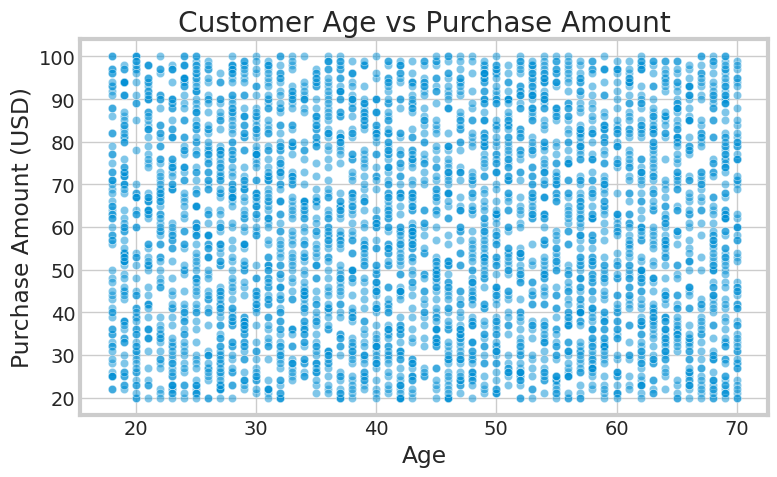

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df, alpha=0.5)
plt.title('Customer Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()


Q6: Which shipping types are most preferred?

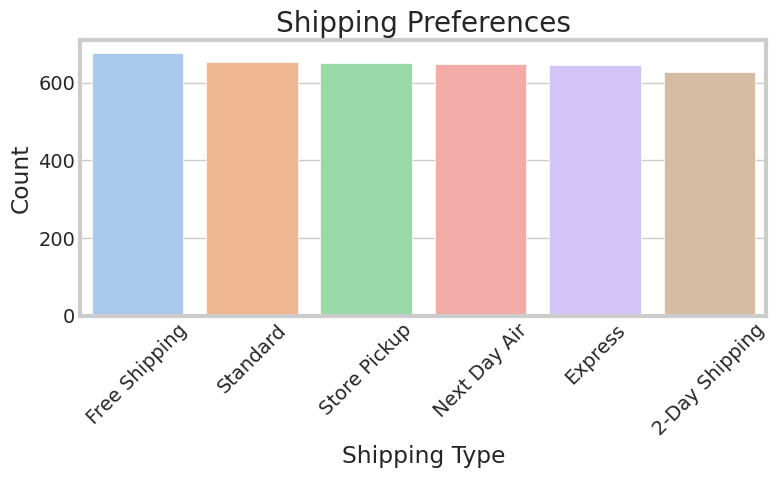

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Shipping Type', data=df, palette='pastel', order=df['Shipping Type'].value_counts().index)
plt.title('Shipping Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q7: Frequency of Purchases - How often do customers shop?

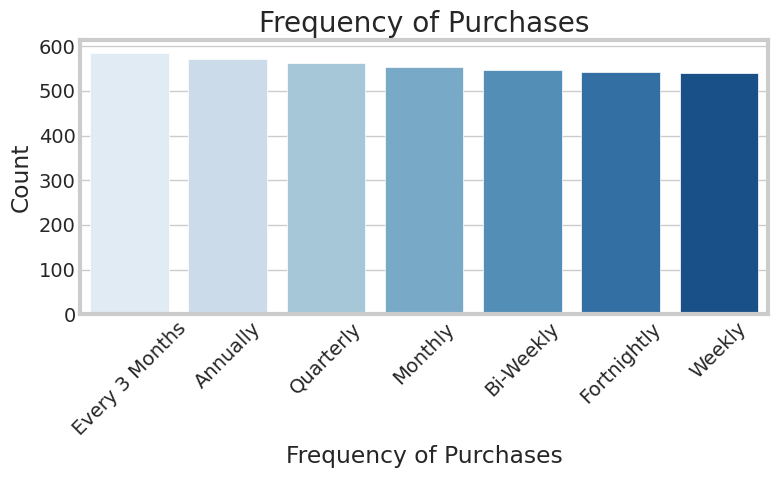

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Frequency of Purchases', data=df, palette='Blues', order=df['Frequency of Purchases'].value_counts().index)
plt.title('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Engineering & Encoding

Step 1: Identify Numerical and Categorical Features

In [12]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("📌 Numerical Features:", numerical_features)
print("📌 Categorical Features:", categorical_features)


📌 Numerical Features: ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
📌 Categorical Features: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


Step 2: One-Hot Encode Categorical Variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
    index=df.index
)

# Combine encoded categorical features with numerical ones
df_encoded = pd.concat([df[numerical_features], encoded_cats], axis=1)

print("✅ Encoded Dataset Shape:", df_encoded.shape)
df_encoded.head()


✅ Encoded Dataset Shape: (3900, 149)


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,64,3.1,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,73,3.1,23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,90,3.5,49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,49,2.7,31,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Preparatory Steps:

Check for Missing Values:

In [14]:
# Check if there are any missing values
missing = df_encoded.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0


Outlier Removal Using IQR (on numerical features only):

In [15]:
import numpy as np

# Filter numeric features for IQR
numeric_data = df_encoded[numerical_features]

# Scale first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_data)

# Compute IQR
Q1 = np.percentile(scaled_numeric, 25, axis=0)
Q3 = np.percentile(scaled_numeric, 75, axis=0)
IQR = Q3 - Q1

# Create mask for non-outliers
mask = ~((scaled_numeric < (Q1 - 1.5 * IQR)) | (scaled_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to the full encoded dataset
df_filtered = df_encoded[mask]

print("✅ Remaining rows after IQR filtering:", df_filtered.shape[0])


✅ Remaining rows after IQR filtering: 3900


Impute Missing Values (if any):


In [16]:
from sklearn.impute import SimpleImputer

# Apply imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_filtered), columns=df_filtered.columns)

print("✅ Data shape after imputation:", df_imputed.shape)


✅ Data shape after imputation: (3900, 149)


Clustering Pipelines (A–D)

Pipeline A: Baseline & Light

In [17]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
selector_a = VarianceThreshold(threshold=0.01)
data_a = selector_a.fit_transform(df_imputed)

# Normalization
scaler_a = MinMaxScaler()
data_a = scaler_a.fit_transform(data_a)


Pipeline B: Robust & Dense


In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Z-score Outlier Removal (already done by IQR before)
knn_imputer = KNNImputer(n_neighbors=5)
data_b_knn = knn_imputer.fit_transform(df_imputed)

# Feature Selection: Remove highly correlated
df_b = pd.DataFrame(data_b_knn, columns=df_imputed.columns)
corr_matrix = df_b.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_b.drop(columns=to_drop, inplace=True)

# Normalization
scaler_b = StandardScaler()
data_b_scaled = scaler_b.fit_transform(df_b)

# Aggregation with PCA
pca_b = PCA(n_components=0.95)
data_b = pca_b.fit_transform(data_b_scaled)


Pipeline C: Skew-Resistant & Filtered

In [19]:
from sklearn.preprocessing import RobustScaler

imputer_c = SimpleImputer(strategy='most_frequent')
data_c_imputed = imputer_c.fit_transform(df_filtered)

selector_c = VarianceThreshold(threshold=0.01)
data_c_selected = selector_c.fit_transform(data_c_imputed)

scaler_c = RobustScaler()
data_c_scaled = scaler_c.fit_transform(data_c_selected)

pca_c = PCA(n_components=0.95)
data_c = pca_c.fit_transform(data_c_scaled)


Pipeline D: Minimalist & Clean

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# No instance selection in D
imputer_d = SimpleImputer(strategy="mean")
data_d_imputed = imputer_d.fit_transform(df_encoded)

# SelectKBest with dummy labels (unsupervised trick using PCA projection temporarily)
selector_d = SelectKBest(k=50)
data_d_selected = selector_d.fit_transform(data_d_imputed, np.random.randint(0, 2, size=len(data_d_imputed)))

# Normalize
scaler_d = MinMaxScaler()
data_d_scaled = scaler_d.fit_transform(data_d_selected)

# Reduce dimensions
pca_d = PCA(n_components=0.95)
data_d = pca_d.fit_transform(data_d_scaled)


Apply K-Means (k=5) to All Pipelines

In [21]:
from sklearn.cluster import KMeans

# Apply K-Means to all 4 pipelines
kmeans_a = KMeans(n_clusters=5, n_init=10, random_state=42).fit(data_a)
kmeans_b = KMeans(n_clusters=5, n_init=10, random_state=42).fit(data_b)
kmeans_c = KMeans(n_clusters=5, n_init=10, random_state=42).fit(data_c)
kmeans_d = KMeans(n_clusters=5, n_init=10, random_state=42).fit(data_d)

# Labels
labels_a = kmeans_a.labels_
labels_b = kmeans_b.labels_
labels_c = kmeans_c.labels_
labels_d = kmeans_d.labels_


Elbow Method

To verify if k=5 is appropriate, plot the Elbow Curve for each pipeline:

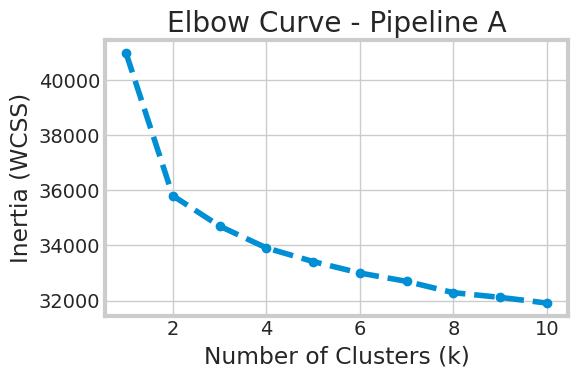

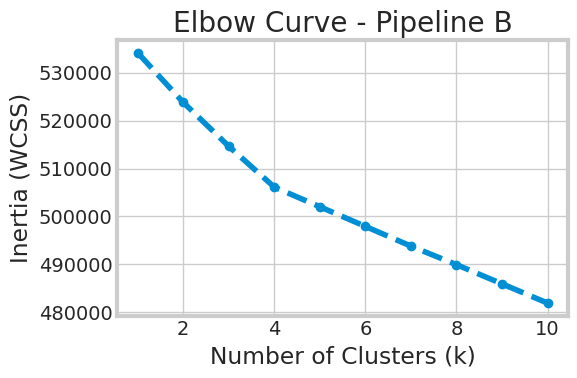

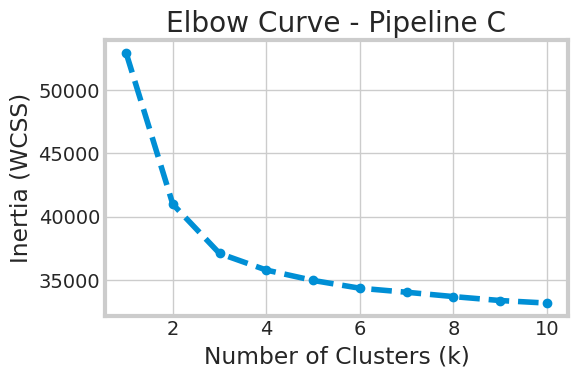

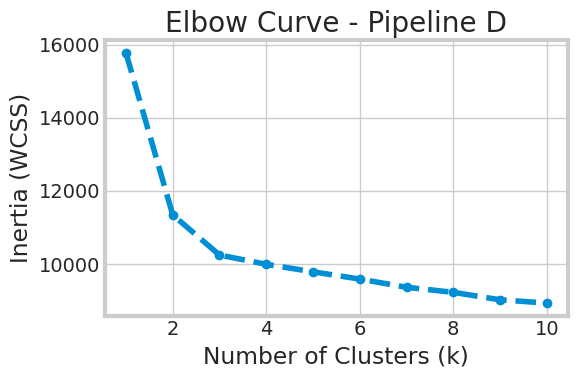

In [22]:
def plot_elbow(data, title):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 11), wcss, 'o--')
    plt.title(f'Elbow Curve - {title}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.tight_layout()
    plt.show()

plot_elbow(data_a, "Pipeline A")
plot_elbow(data_b, "Pipeline B")
plot_elbow(data_c, "Pipeline C")
plot_elbow(data_d, "Pipeline D")


Cluster Evaluation Metrics


We will evaluate the quality of clusters using:



Silhouette Score (higher is better)



Inertia (WCSS) (lower is better)



Davies–Bouldin Index (lower is better)



Calinski–Harabasz Score (higher is better)

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

results = []

for name, data, labels in zip(
    ["A", "B", "C", "D"],
    [data_a, data_b, data_c, data_d],
    [labels_a, labels_b, labels_c, labels_d]
):
    silhouette = silhouette_score(data, labels)
    inertia = KMeans(n_clusters=5, random_state=42, n_init=10).fit(data).inertia_
    dbi = davies_bouldin_score(data, labels)
    ch = calinski_harabasz_score(data, labels)

    results.append({
        "Pipeline": f"Pipeline {name}",
        "Silhouette Score": silhouette,
        "Inertia": inertia,
        "Davies–Bouldin Index": dbi,
        "Calinski–Harabasz Score": ch
    })

eval_df = pd.DataFrame(results).round(4)
display(eval_df)


,Pipeline,Silhouette Score,Inertia,Davies–Bouldin Index,Calinski–Harabasz Score
0,Pipeline A,0.0451,33415.7410,4.2343,220.8482
1,Pipeline B,0.0279,502010.6613,5.0074,62.4218
2,Pipeline C,0.0869,34972.4106,3.2221,500.3585
3,Pipeline D,0.0914,9788.9227,3.1050,595.4191


Visual Comparison of Pipelines:

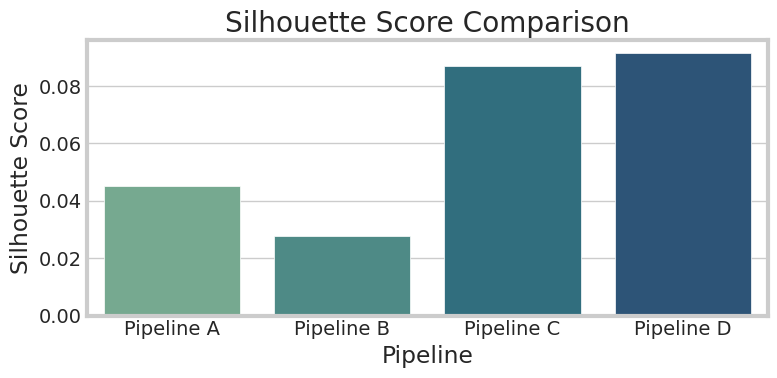

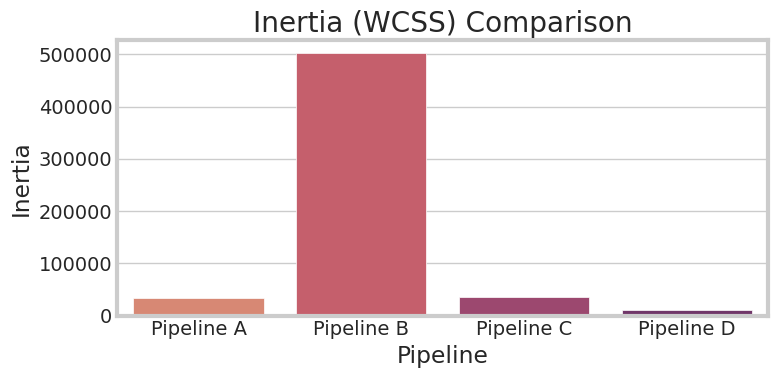

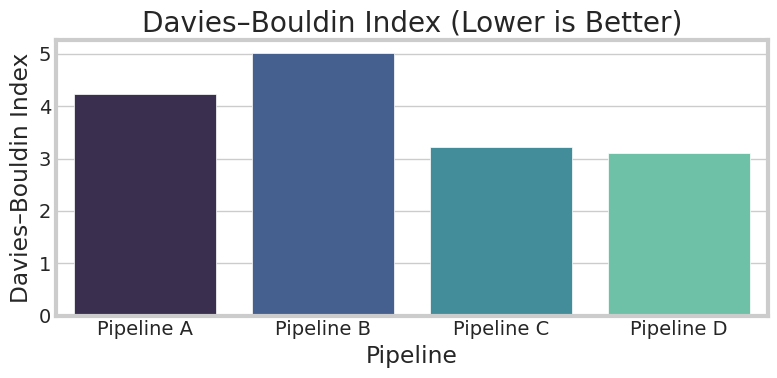

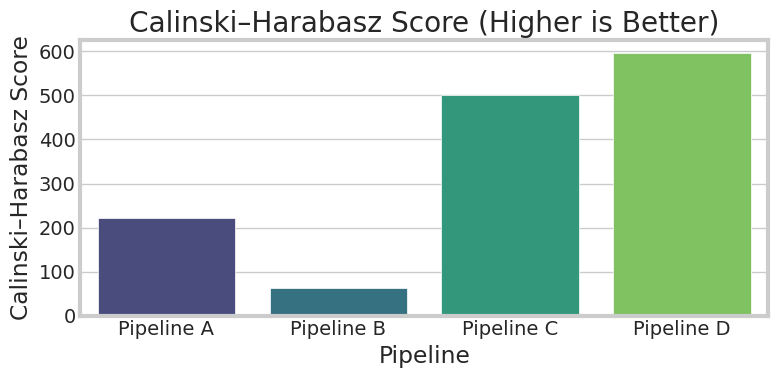

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Silhouette Score", palette="crest")
plt.title("Silhouette Score Comparison")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Inertia", palette="flare")
plt.title("Inertia (WCSS) Comparison")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Davies–Bouldin Index", palette="mako")
plt.title("Davies–Bouldin Index (Lower is Better)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=eval_df, x="Pipeline", y="Calinski–Harabasz Score", palette="viridis")
plt.title("Calinski–Harabasz Score (Higher is Better)")
plt.tight_layout()
plt.show()


Cluster Profiling & Interpretation:

We'll profile each cluster using descriptive statistics and categorical mode values, then auto-label them based on dominant characteristics and visualize segment distribution.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Function: Cluster Profiling
# ================================
def profile_clusters(df_original, labels, cluster_names_dict=None, pipeline_name="Pipeline"):
    df_clusters = df_original.copy()
    df_clusters["Cluster"] = labels

    # Step 1: Numerical Profiling (means)
    numerical_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
    num_profile = df_clusters.groupby("Cluster")[numerical_cols].mean().round(2)

    # Step 2: Categorical Profiling (most frequent)
    categorical_cols = ["Gender", "Category", "Season", "Subscription Status", "Shipping Type"]
    cat_profile = df_clusters.groupby("Cluster")[categorical_cols].agg(lambda x: x.value_counts().index[0])

    # Step 3: Merge cluster profiles
    cluster_profile = pd.concat([num_profile, cat_profile], axis=1)

    # Step 4: Auto-label clusters
    if cluster_names_dict:
        df_clusters["Segment"] = df_clusters["Cluster"].map(cluster_names_dict)
    else:
        df_clusters["Segment"] = "Cluster " + df_clusters["Cluster"].astype(str)

    # Step 5: Pie chart of segment sizes
    plt.figure(figsize=(6, 6))
    df_clusters["Segment"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
    plt.title(f"Customer Segment Distribution ({pipeline_name})")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Step 6: Visualize numerical columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_clusters, x="Segment", y=col, palette="pastel")
        plt.title(f"{col} by Segment - {pipeline_name}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    return df_clusters, cluster_profile


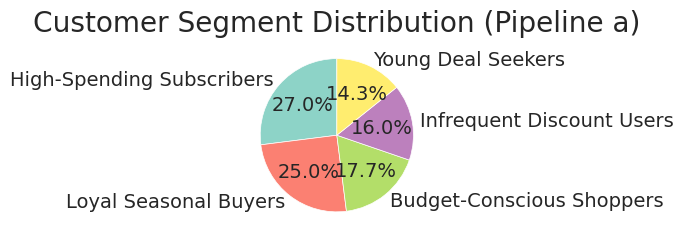

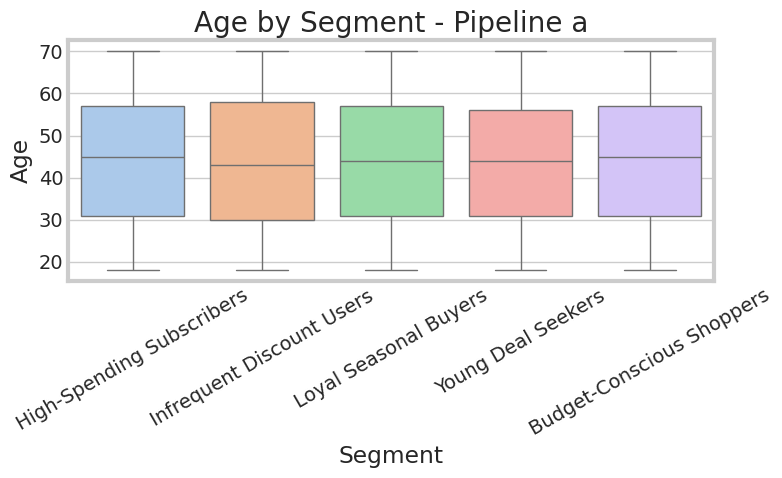

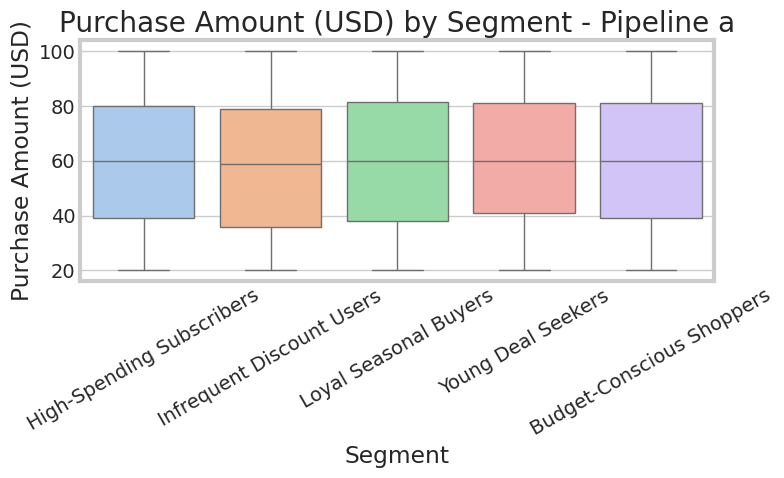

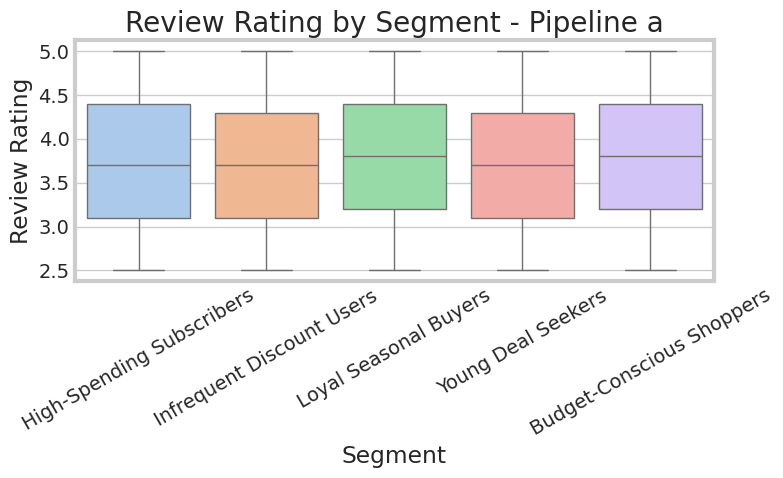

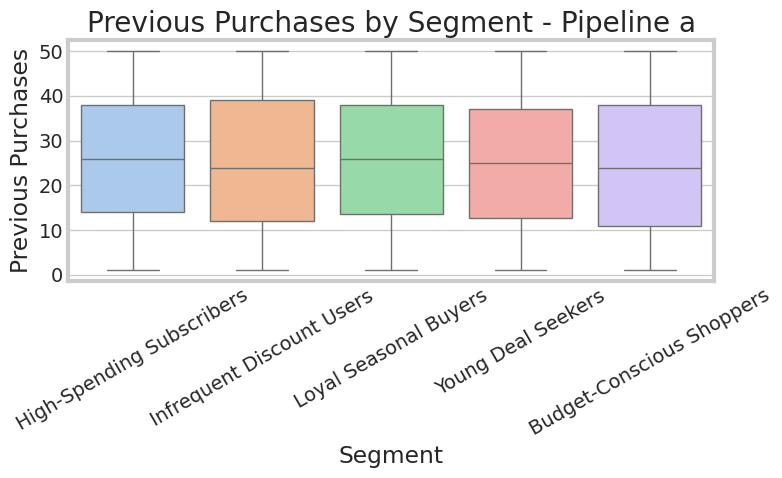

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender,Category,Season,Subscription Status,Shipping Type
Cluster,,,,,,,,,
0,43.62,60.50,3.70,24.75,Female,Clothing,Fall,No,Free Shipping
1,44.02,59.98,3.78,25.65,Male,Clothing,Fall,No,Express
2,44.23,59.49,3.74,26.08,Male,Clothing,Spring,Yes,Express
3,44.00,58.92,3.73,25.17,Male,Clothing,Spring,No,Next Day Air
4,44.32,60.05,3.77,24.48,Female,Accessories,Spring,No,Free Shipping


In [58]:
# Custom cluster labels (example for Pipeline a)
cluster_names_a = {
    0: "Young Deal Seekers",
    1: "Loyal Seasonal Buyers",
    2: "High-Spending Subscribers",
    3: "Infrequent Discount Users",
    4: "Budget-Conscious Shoppers"
}

# Apply profiling to Pipeline a results
df_a_segmented, profile_a = profile_clusters(
    df_original=df,
    labels=labels_a,
    cluster_names_dict=cluster_names_a,
    pipeline_name="Pipeline a"
)

# Show the resulting cluster profile table
display(profile_a)


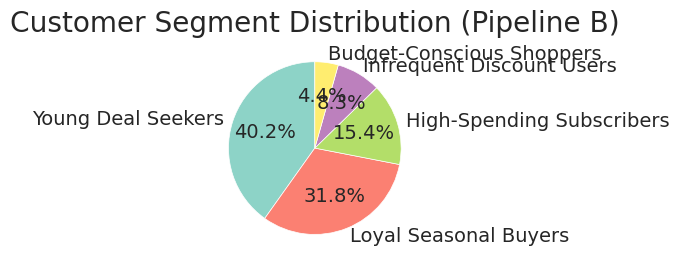

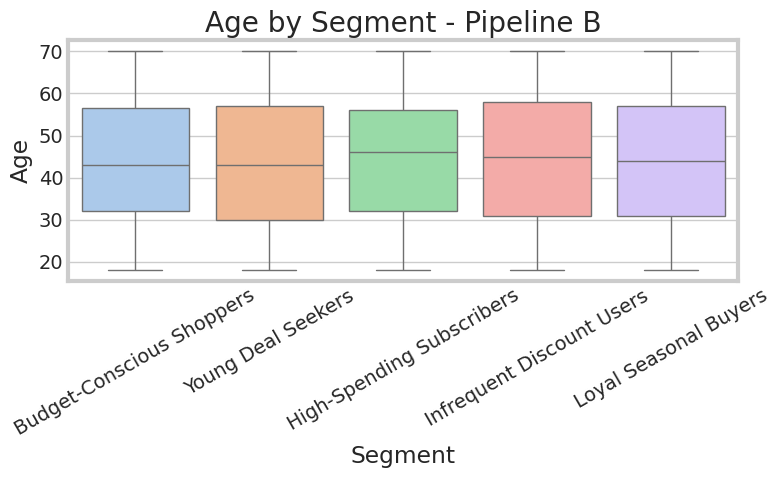

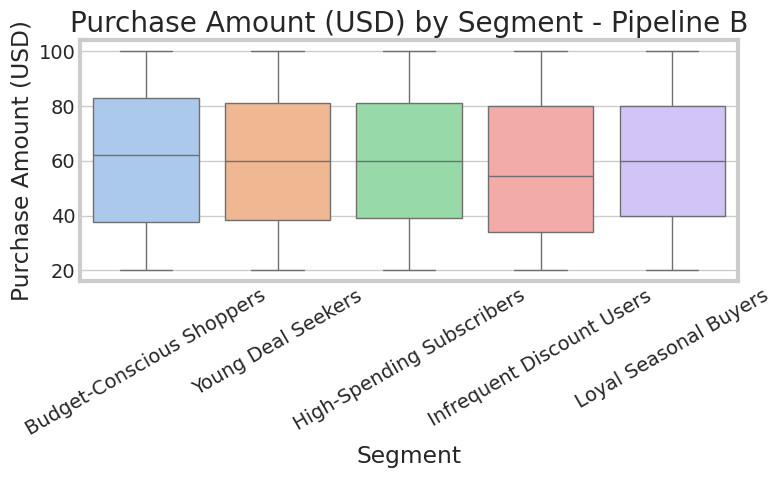

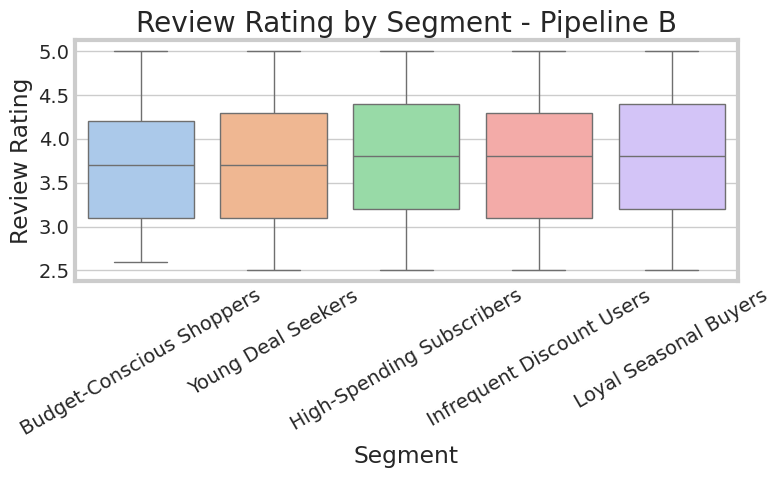

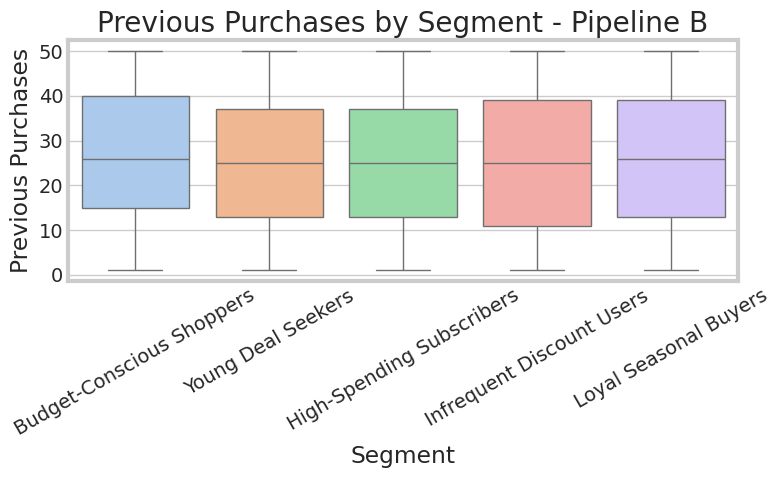

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender,Category,Season,Subscription Status,Shipping Type
Cluster,,,,,,,,,
0,43.73,59.93,3.73,25.04,Male,Clothing,Winter,No,Standard
1,44.22,59.84,3.77,25.73,Male,Accessories,Fall,No,Store Pickup
2,44.44,60.26,3.79,25.23,Male,Footwear,Spring,No,Free Shipping
3,44.31,57.17,3.75,24.96,Male,Outerwear,Fall,No,Free Shipping
4,44.29,60.88,3.68,26.68,Male,Clothing,Spring,No,Next Day Air


In [59]:
# Custom cluster labels (example for Pipeline B)
cluster_names_b = {
    0: "Young Deal Seekers",
    1: "Loyal Seasonal Buyers",
    2: "High-Spending Subscribers",
    3: "Infrequent Discount Users",
    4: "Budget-Conscious Shoppers"
}

# Apply profiling to Pipeline B results
df_b_segmented, profile_b = profile_clusters(
    df_original=df,
    labels=labels_b,
    cluster_names_dict=cluster_names_b,
    pipeline_name="Pipeline B"
)

# Show the resulting cluster profile table
display(profile_b)


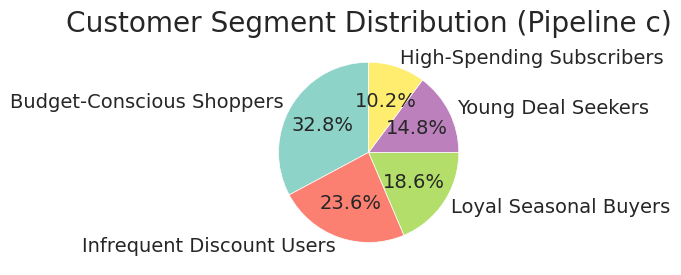

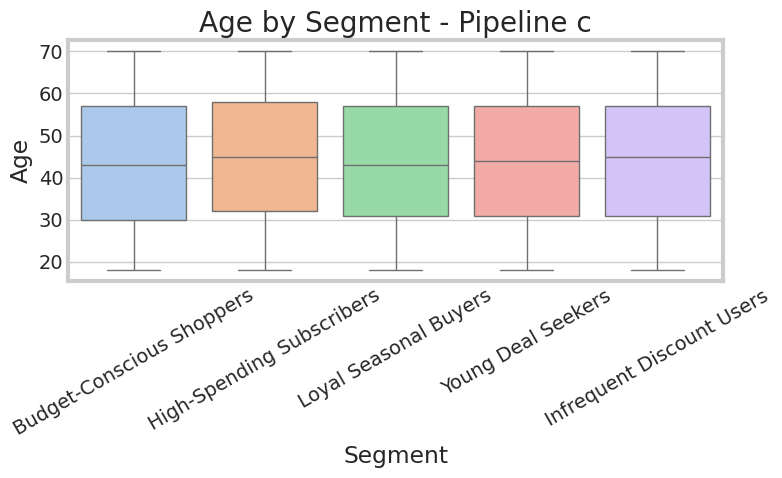

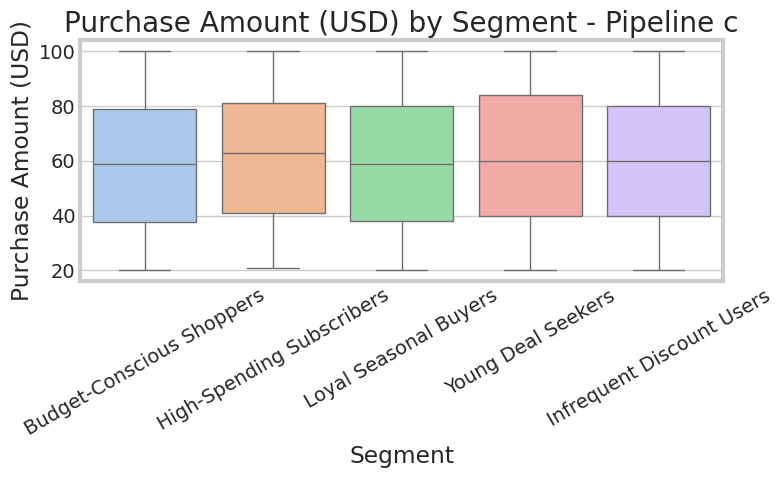

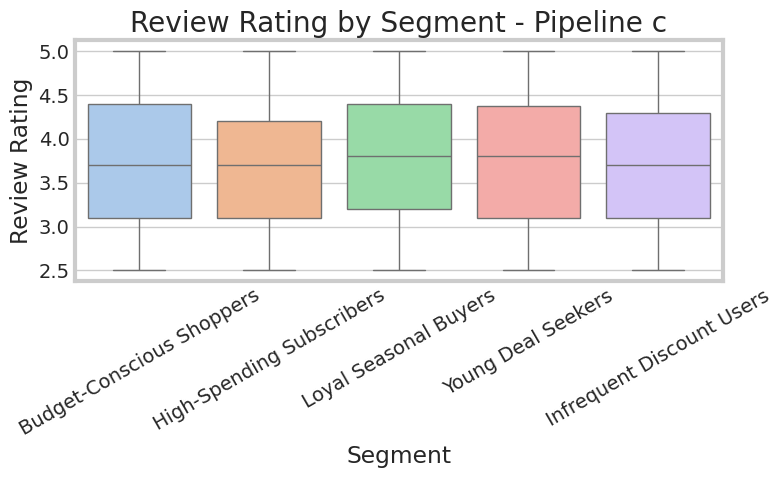

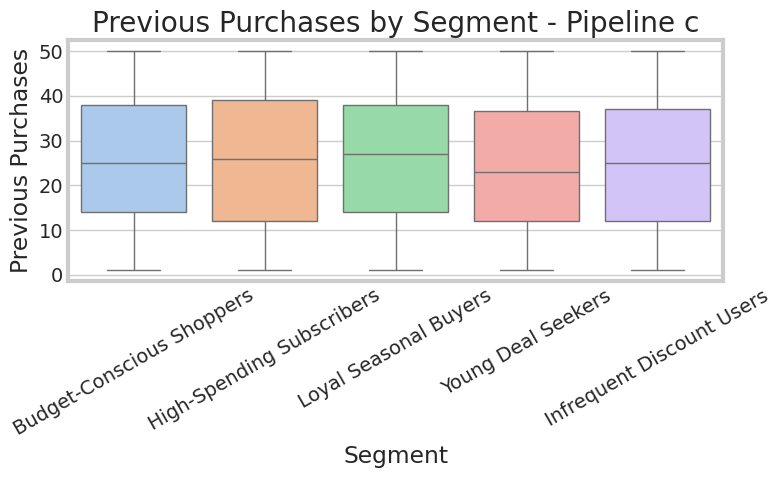

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender,Category,Season,Subscription Status,Shipping Type
Cluster,,,,,,,,,
0,44.16,61.53,3.76,24.36,Female,Clothing,Fall,No,Next Day Air
1,43.82,59.46,3.78,26.17,Male,Clothing,Winter,No,Store Pickup
2,44.74,61.59,3.69,25.86,Male,Clothing,Fall,Yes,Standard
3,44.07,59.78,3.74,24.62,Female,Clothing,Spring,No,Free Shipping
4,43.96,58.56,3.76,25.71,Male,Clothing,Spring,Yes,Next Day Air


In [60]:
# Custom cluster labels (example for Pipeline c)
cluster_names_c = {
    0: "Young Deal Seekers",
    1: "Loyal Seasonal Buyers",
    2: "High-Spending Subscribers",
    3: "Infrequent Discount Users",
    4: "Budget-Conscious Shoppers"
}

# Apply profiling to Pipeline c results
df_c_segmented, profile_c = profile_clusters(
    df_original=df,
    labels=labels_c,
    cluster_names_dict=cluster_names_c,
    pipeline_name="Pipeline c"
)

# Show the resulting cluster profile table
display(profile_c)


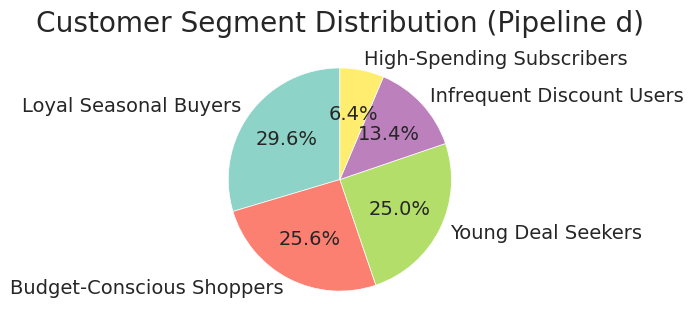

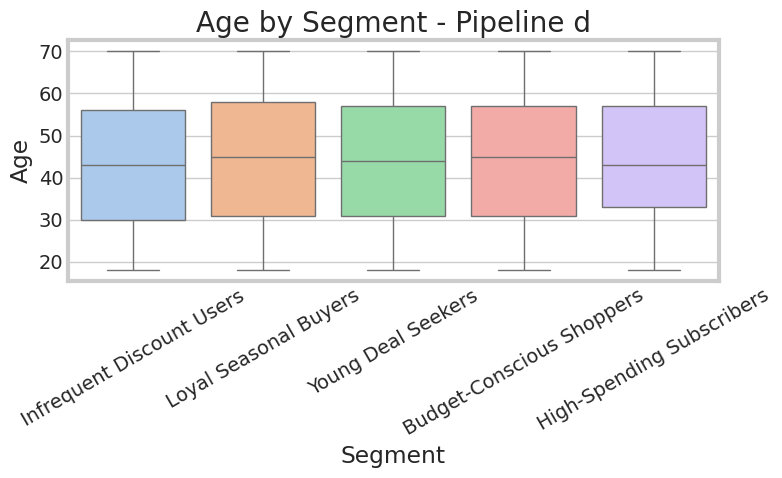

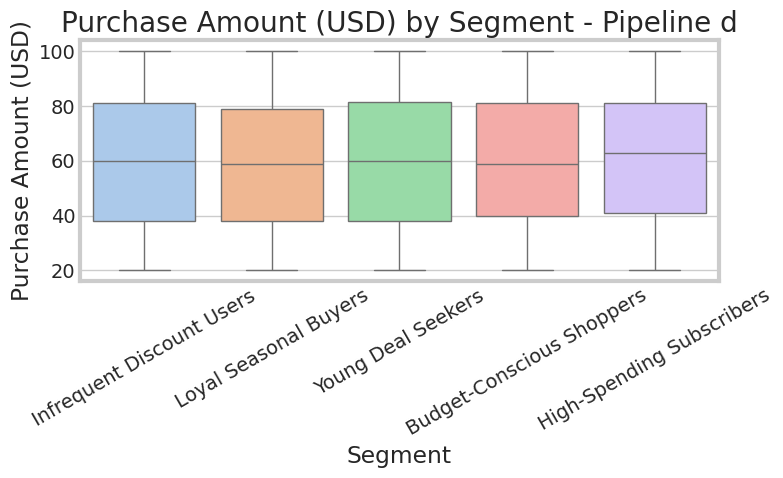

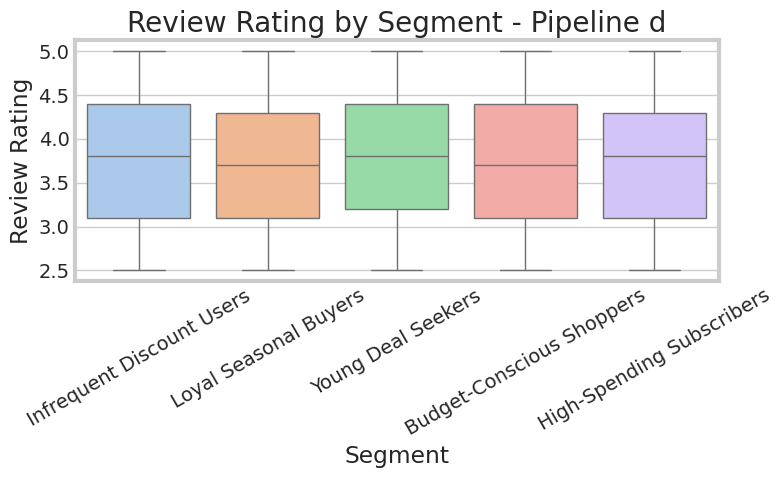

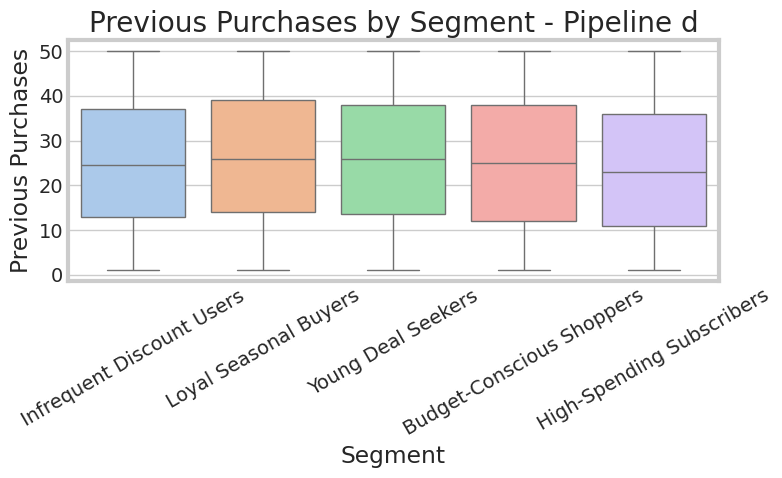

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender,Category,Season,Subscription Status,Shipping Type
Cluster,,,,,,,,,
0,44.02,59.98,3.78,25.65,Male,Clothing,Fall,No,Express
1,44.32,59.12,3.73,26.09,Male,Clothing,Spring,Yes,Next Day Air
2,44.23,61.13,3.74,23.54,Female,Clothing,Spring,No,Free Shipping
3,43.76,59.63,3.75,24.98,Male,Clothing,Spring,Yes,Store Pickup
4,43.95,60.03,3.74,24.86,Female,Clothing,Fall,No,Standard


In [61]:
# Custom cluster labels (example for Pipeline d)
cluster_names_d = {
    0: "Young Deal Seekers",
    1: "Loyal Seasonal Buyers",
    2: "High-Spending Subscribers",
    3: "Infrequent Discount Users",
    4: "Budget-Conscious Shoppers"
}

# Apply profiling to Pipeline d results
df_d_segmented, profile_d = profile_clusters(
    df_original=df,
    labels=labels_d,
    cluster_names_dict=cluster_names_d,
    pipeline_name="Pipeline d"
)

# Show the resulting cluster profile table
display(profile_d)
